In [1]:
# Load in relevant packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import datetime as dt
import missingno as msno
import seaborn as sns
sns.set()
from sklearn.linear_model import LinearRegression

%matplotlib inline

In [2]:
# Load the data
access = pd.read_csv('food_data/access.csv', index_col=False)
restaurants = pd.read_csv('food_data/restaurants.csv', index_col=False)
socioeconomic = pd.read_csv('food_data/socioeconomic.csv', index_col=False)
stores = pd.read_csv('food_data/stores.csv', index_col=False)
supp_state = pd.read_csv('food_data/supp_state.csv', index_col=False)
health = pd.read_csv('food_data/health.csv', index_col=False)

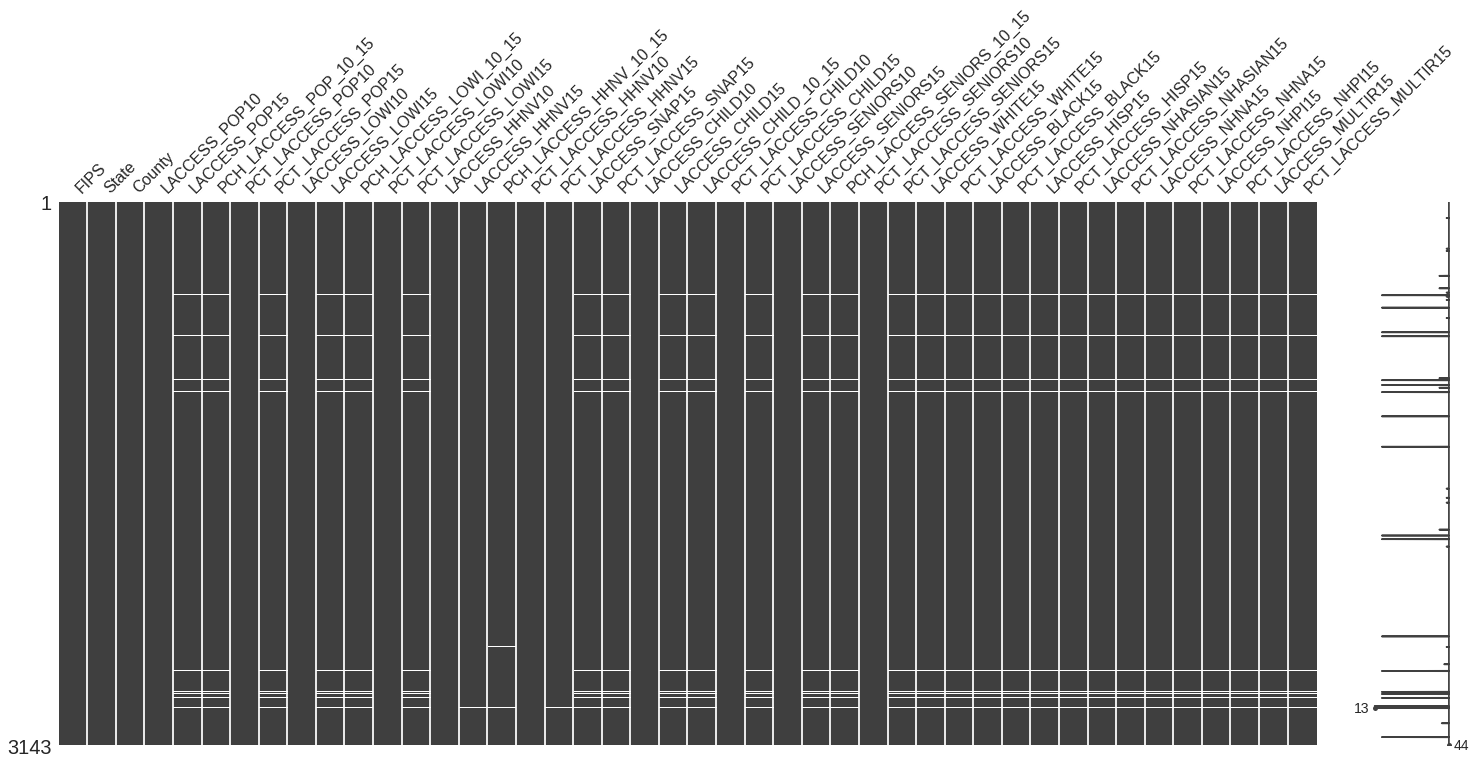

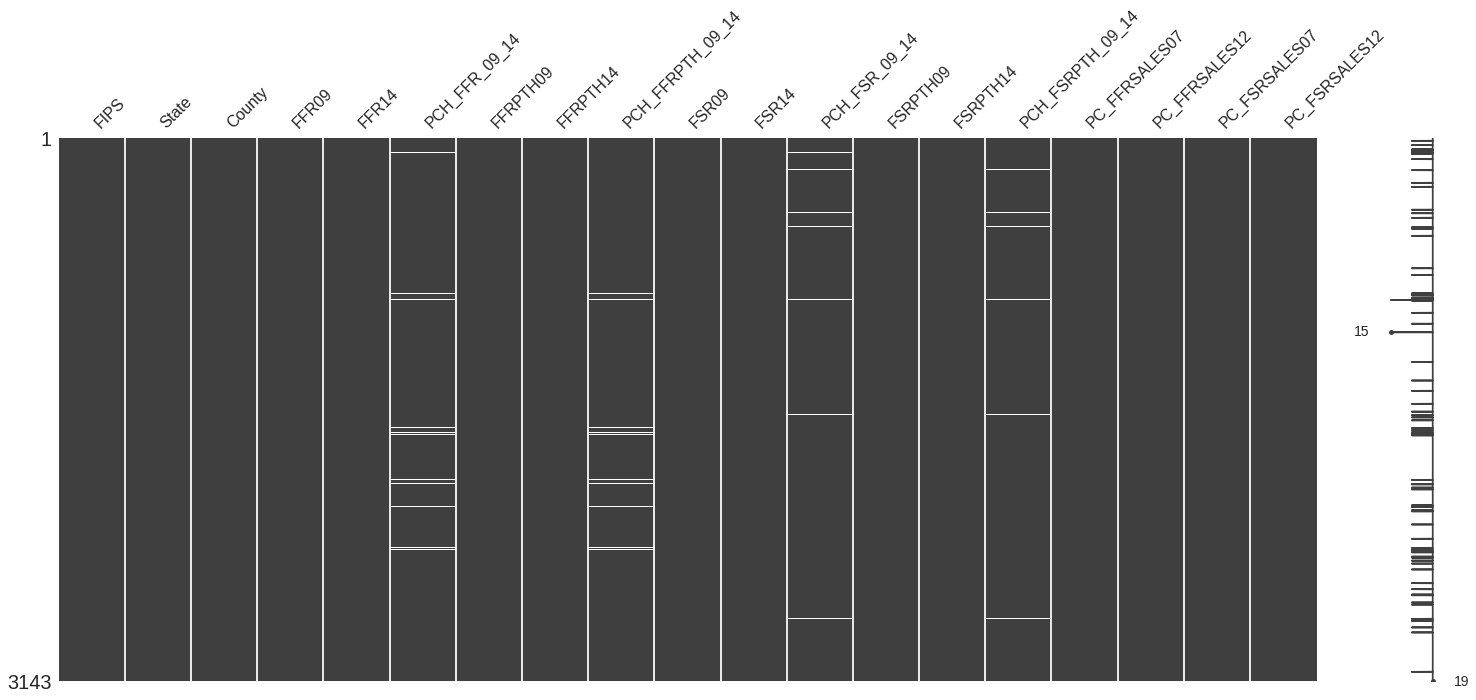

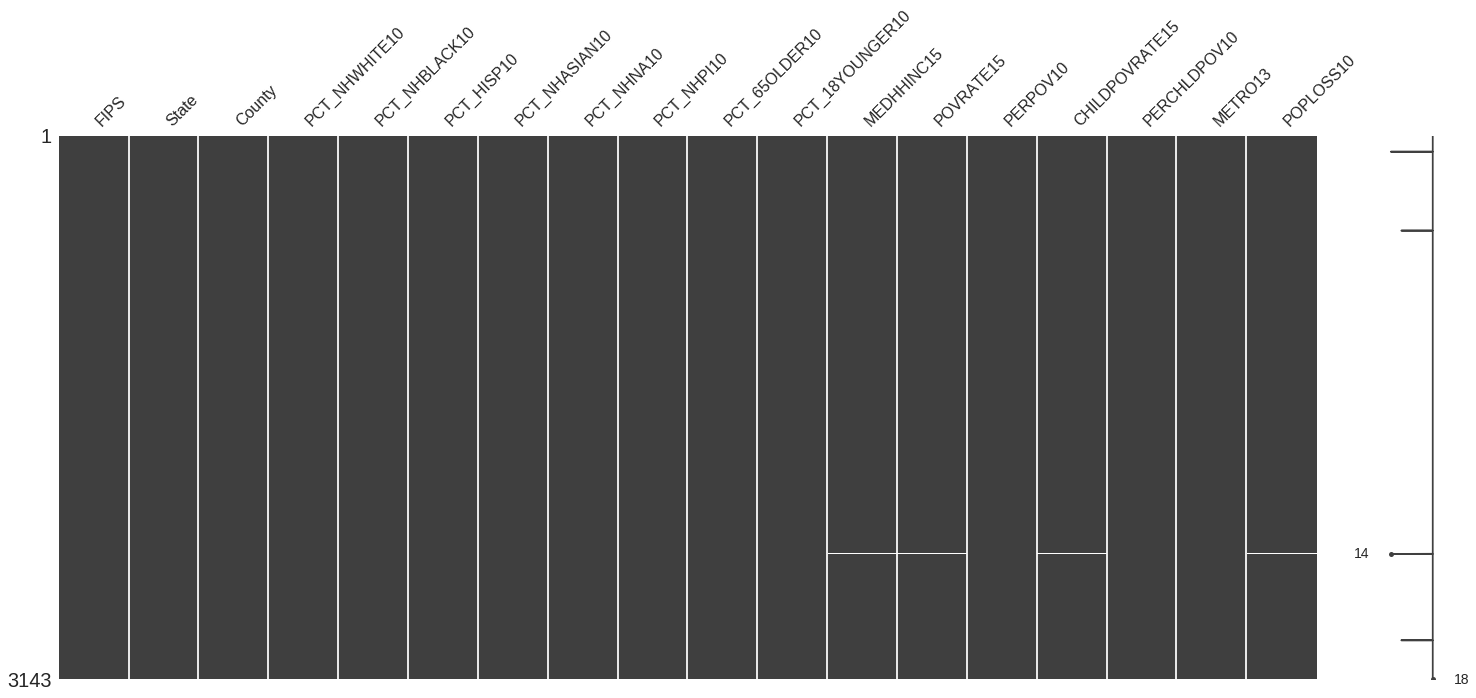

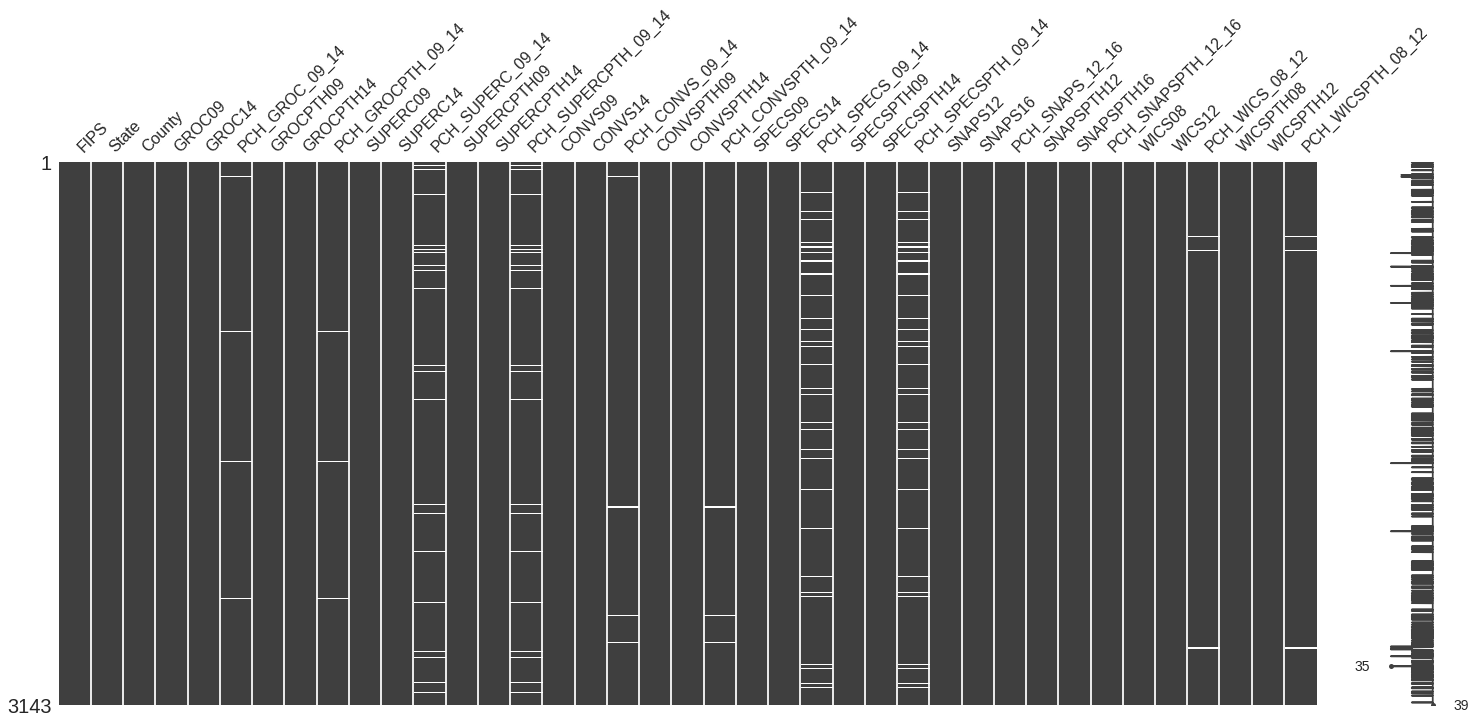

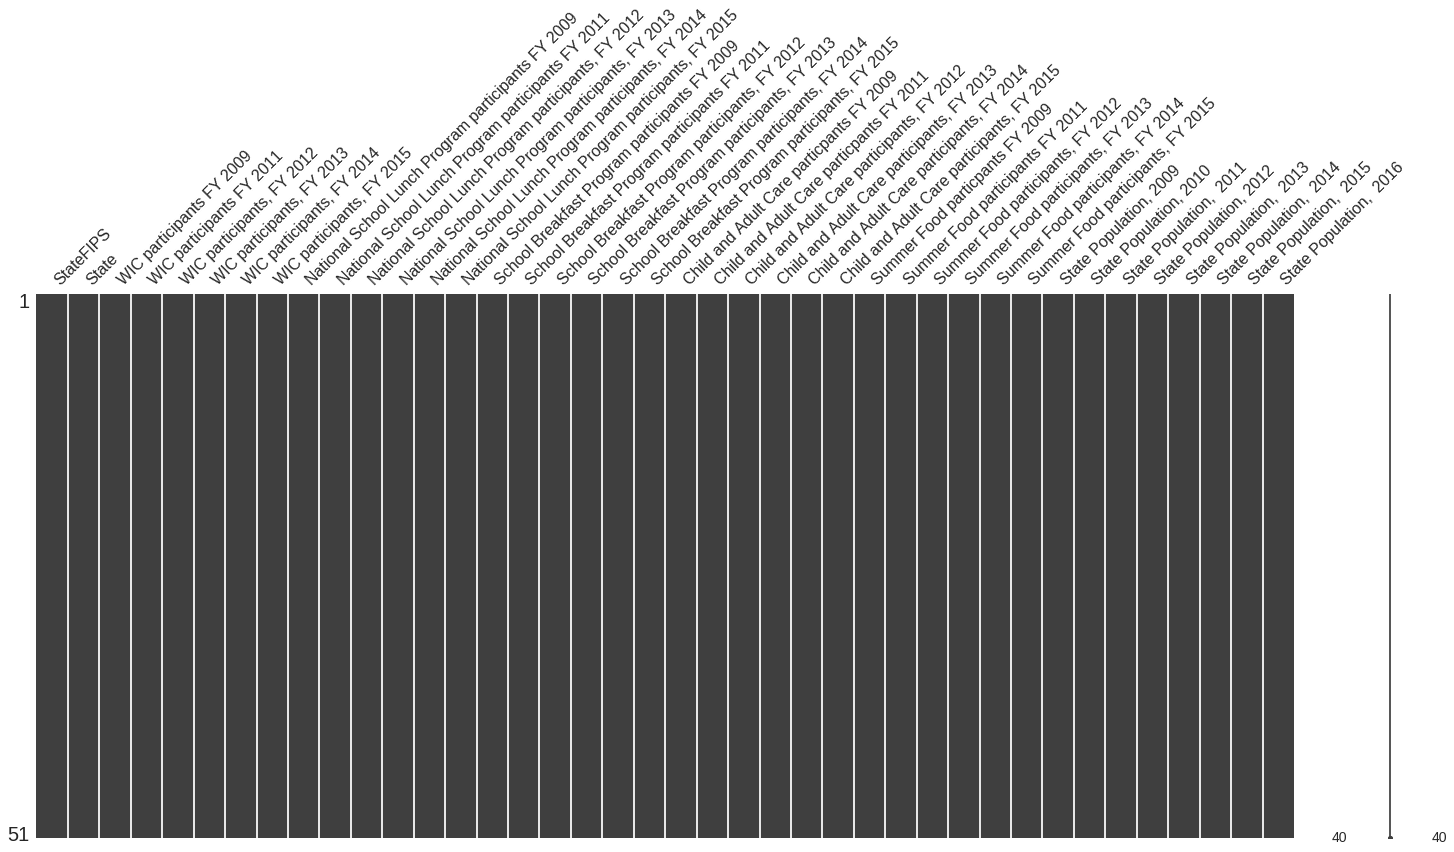

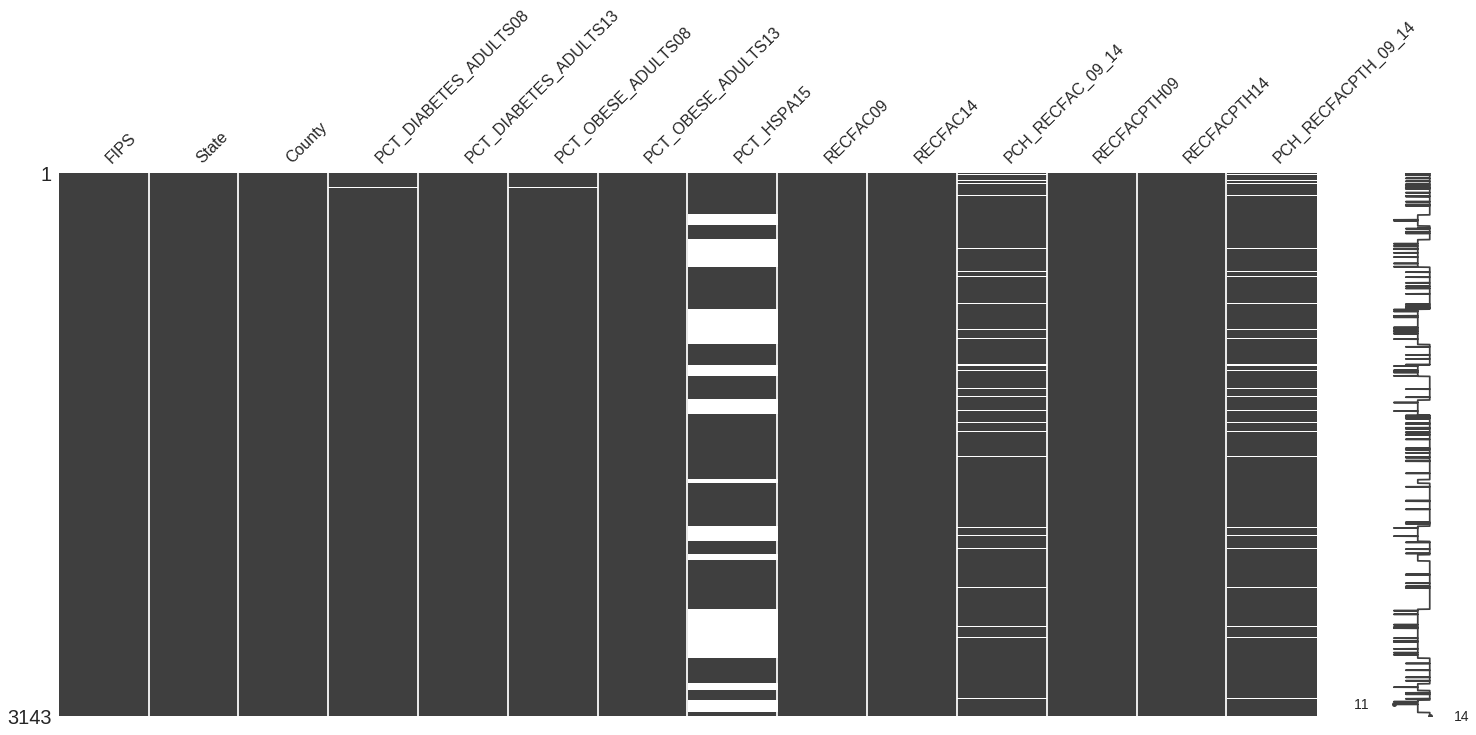

In [3]:
# Use missingno to visualize missing data points
datasets = [access, restaurants, socioeconomic, stores, supp_state, health]
for df in datasets:
    msno.matrix(df)

In [4]:
# Drop columns with tons of missing values
health.drop(['PCT_HSPA15', 'PCH_RECFAC_09_14', 'PCH_RECFACPTH_09_14'], axis = 1, inplace=True)

In [5]:
# See shape of new datasets
drop_rows = [access, restaurants, socioeconomic, stores, supp_state, health]
for df in drop_rows:
    print(df.shape)
    df.replace('', np.nan, inplace=True)
    df.dropna(axis=0, how='any', inplace=True)
    print(df.shape)

(3143, 44)
(3103, 44)
(3143, 19)
(3063, 19)
(3143, 18)
(3139, 18)
(3143, 39)
(2765, 39)
(51, 40)
(51, 40)
(3143, 11)
(3137, 11)


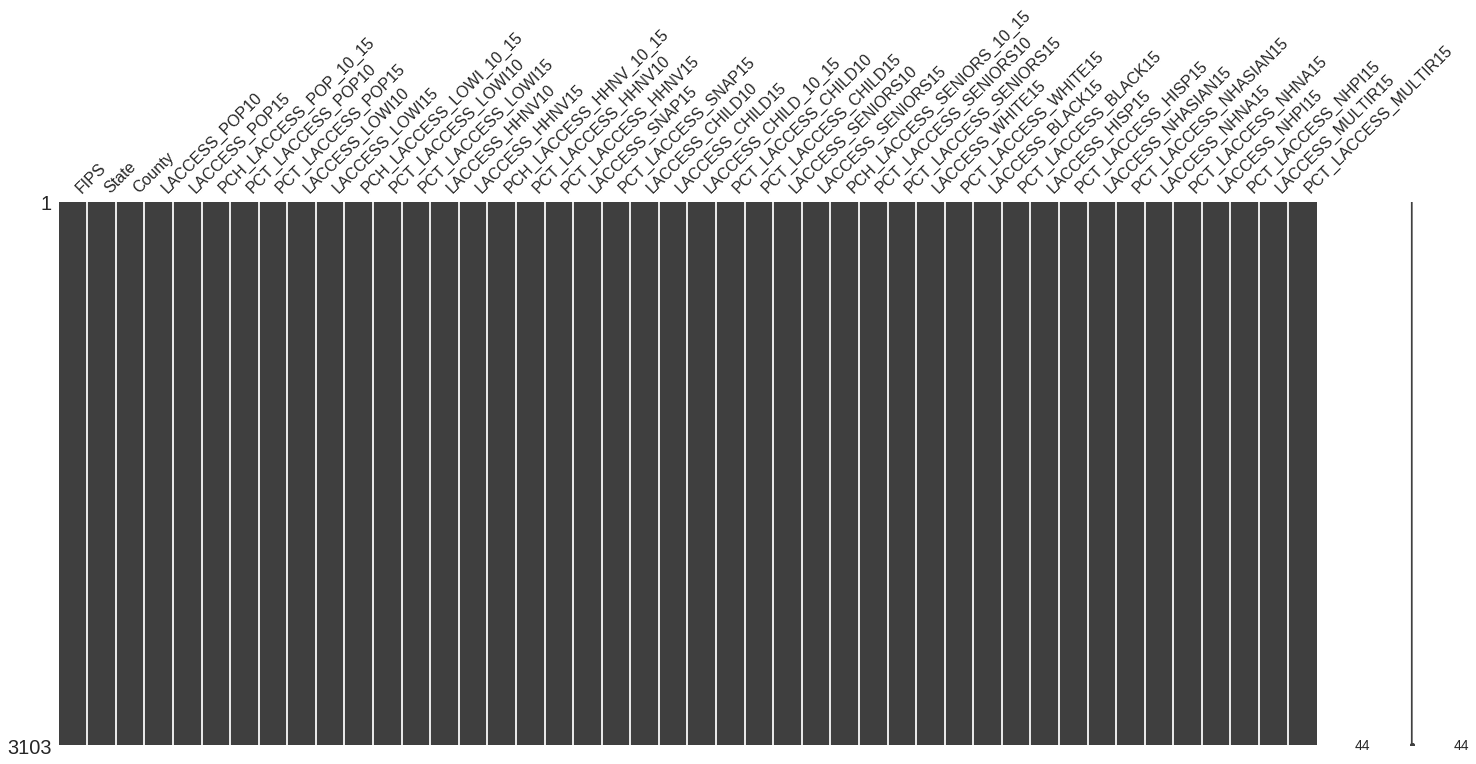

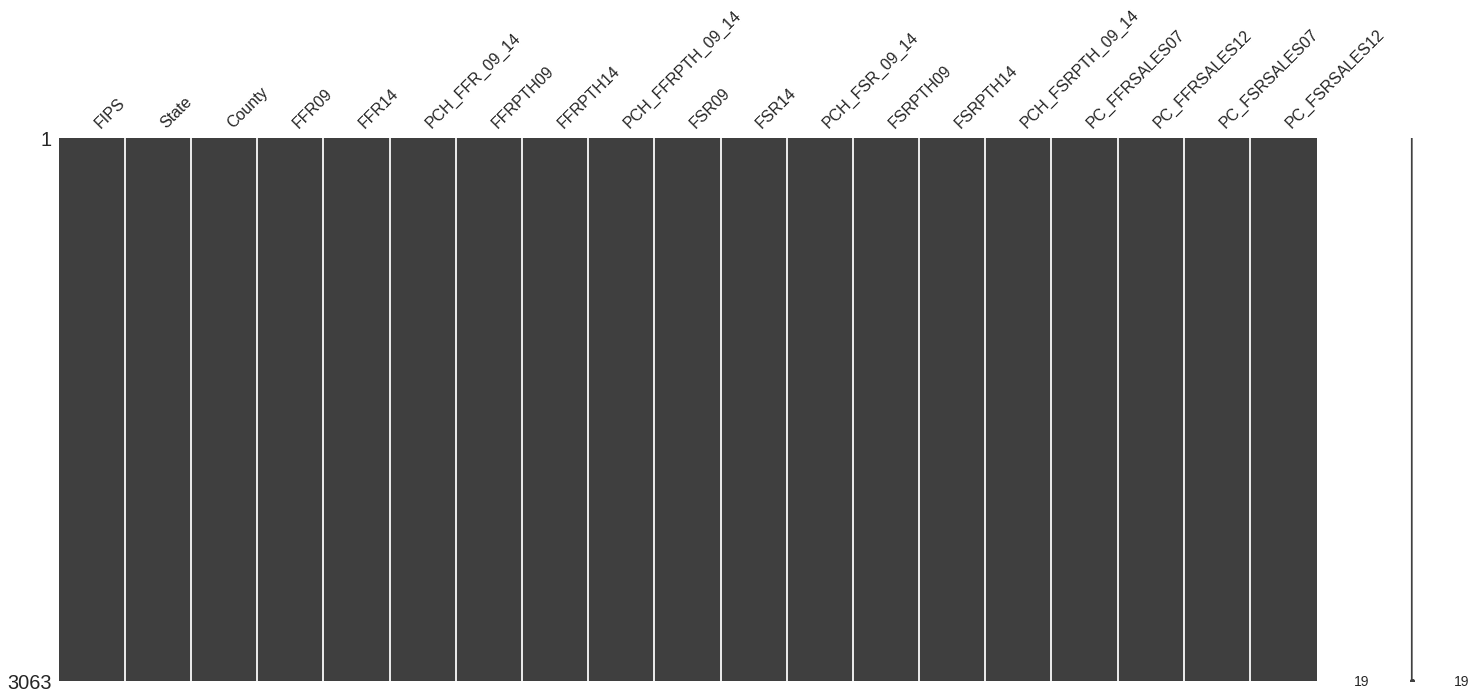

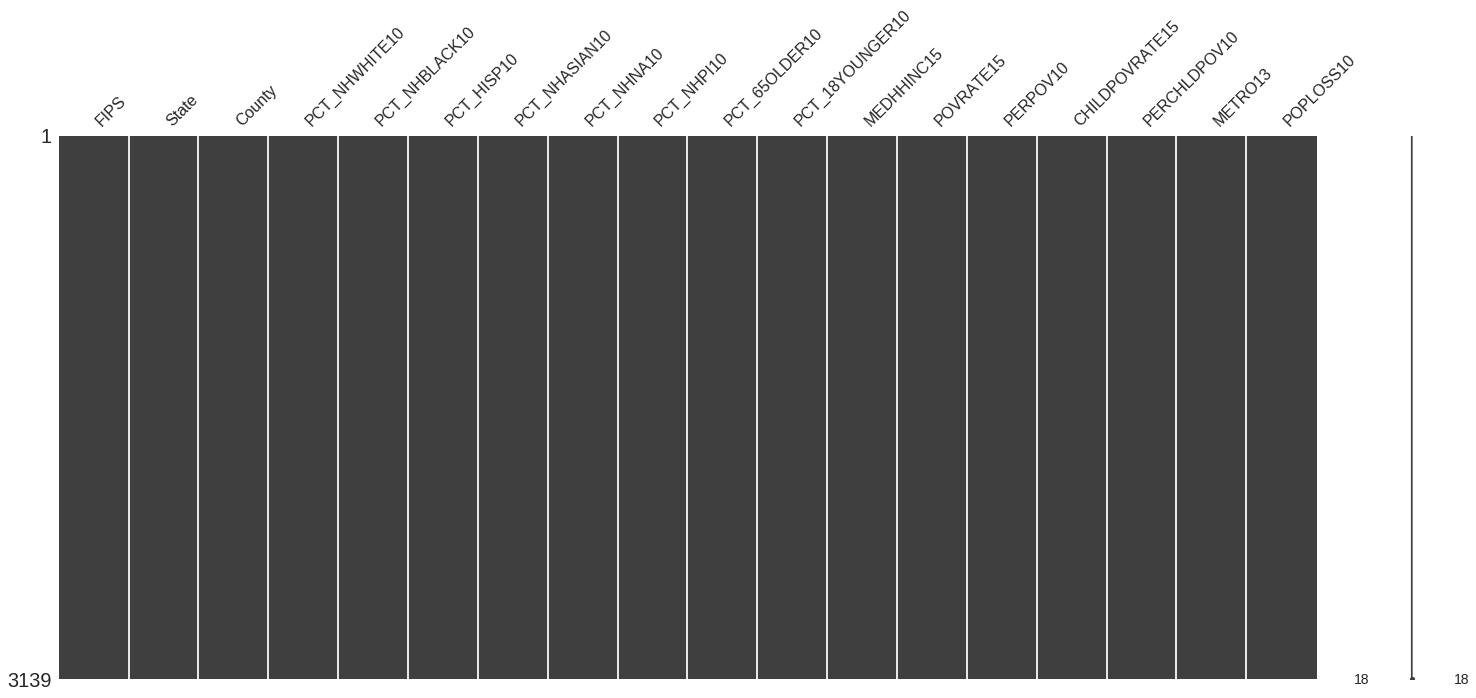

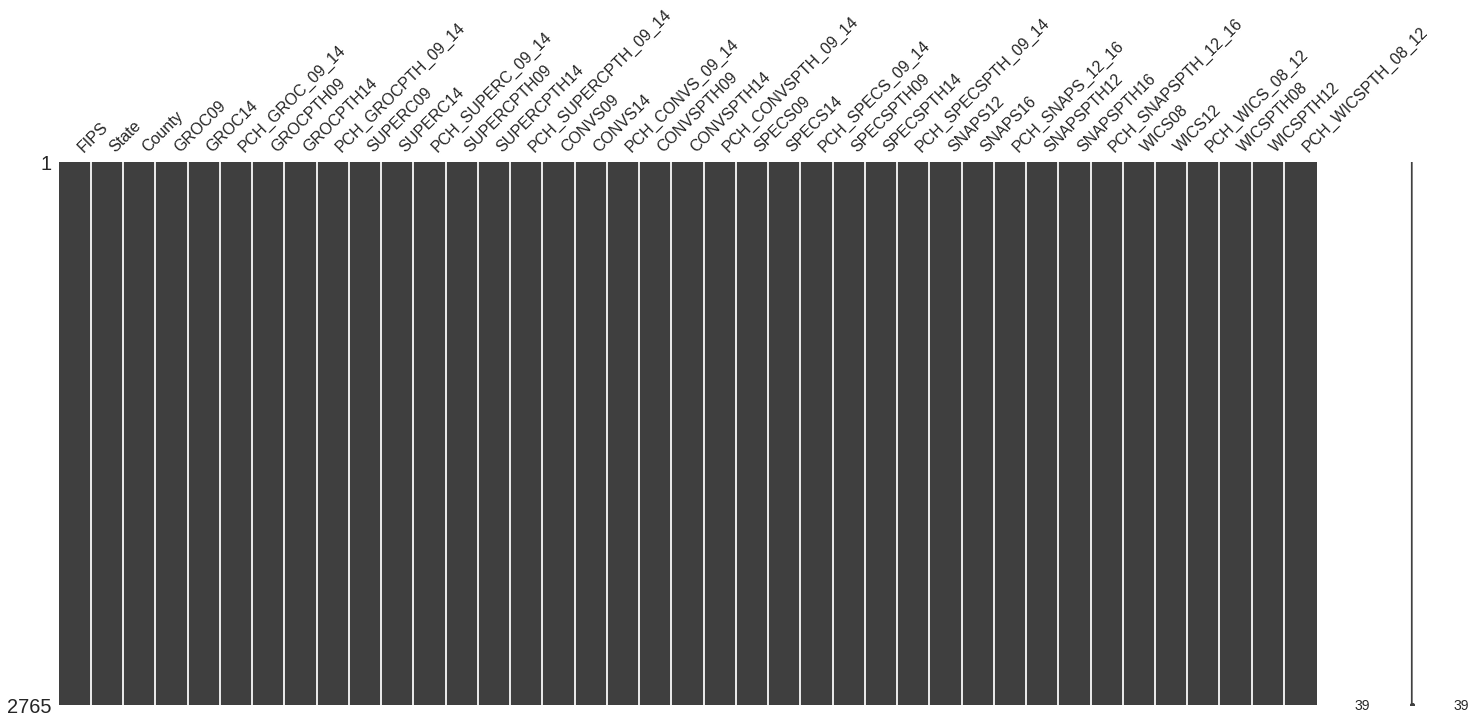

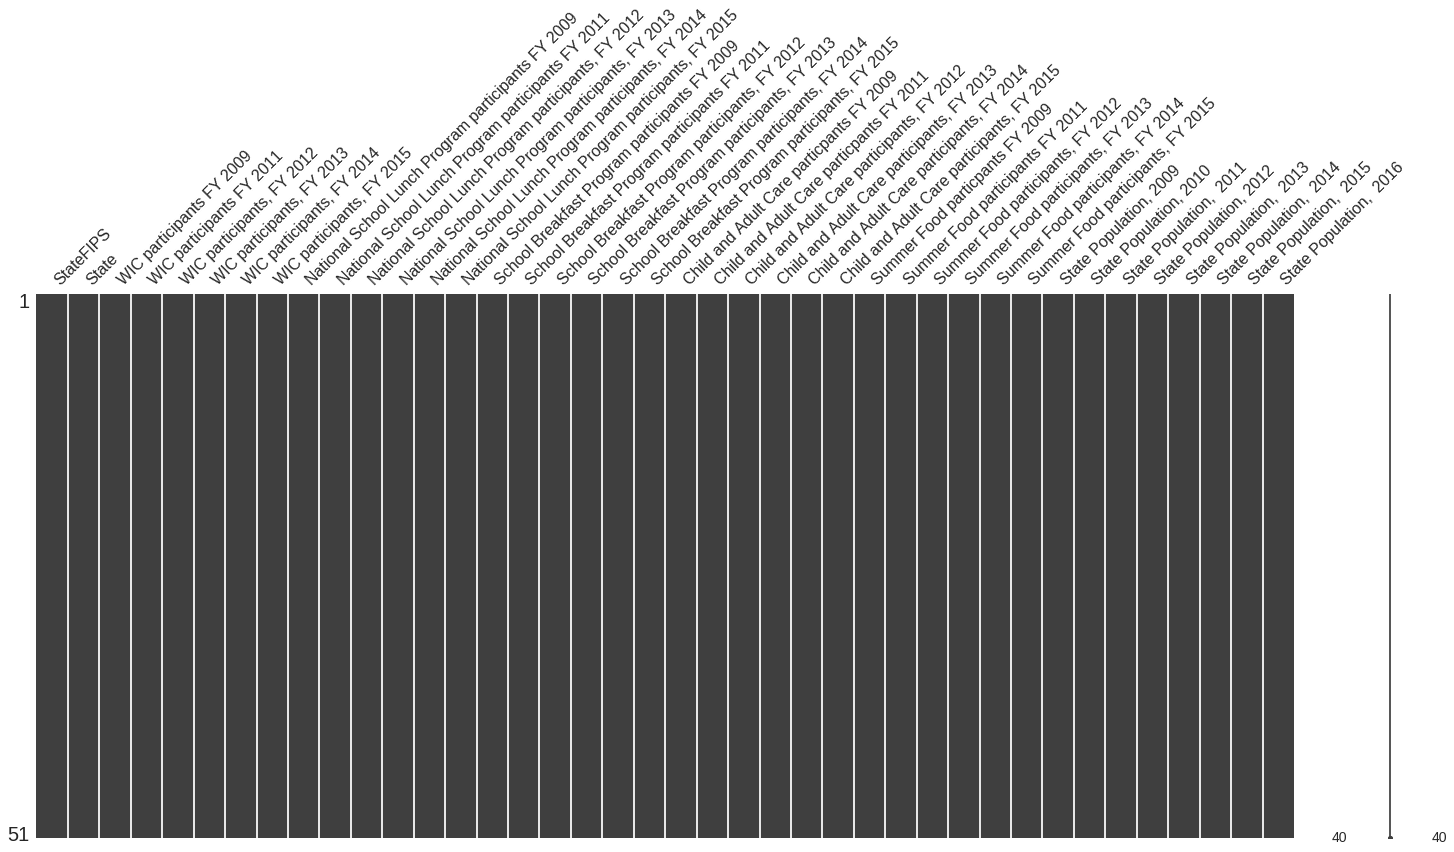

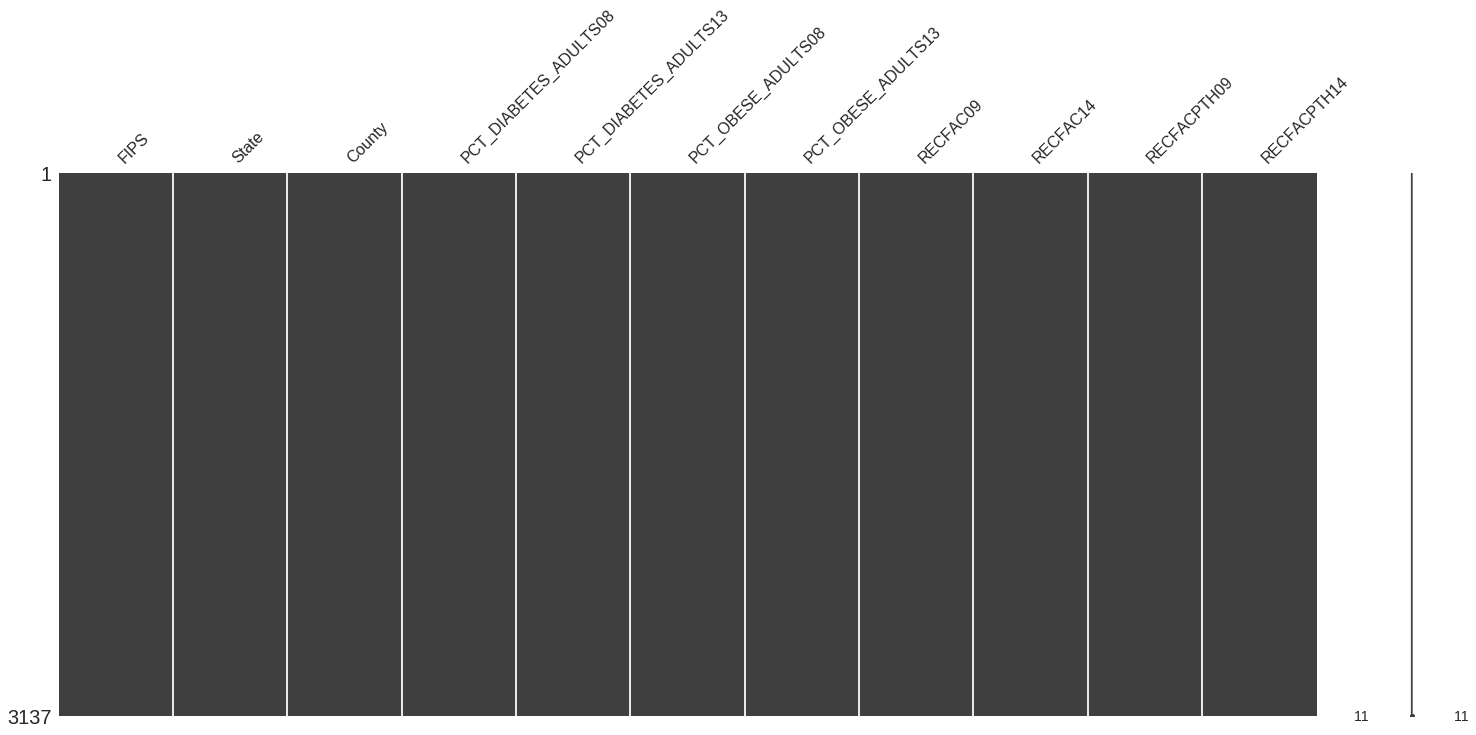

In [6]:
# Revisualize to see if there are still missing values
datasets = [access, restaurants, socioeconomic, stores, supp_state, health]
for df in datasets:
    msno.matrix(df)

Removed all missing values!

In [33]:
# Look at general trends
race = socioeconomic[['PCT_NHWHITE10', 'PCT_NHBLACK10', 'PCT_HISP10', 'PCT_NHASIAN10',\
                    'PCT_NHNA10', 'PCT_NHPI10']].groupby(socioeconomic['State']).mean()
race.describe()

,PCT_NHWHITE10,PCT_NHBLACK10,PCT_HISP10,PCT_NHASIAN10,PCT_NHNA10,PCT_NHPI10
count,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000
mean,76.733851,8.267296,8.168501,2.033487,2.399076,0.254063
std,16.327762,11.815085,8.874440,4.318410,4.984463,1.350042
min,28.199838,0.209927,1.020656,0.352957,0.135199,0.017452
25%,66.793640,1.090173,2.971095,0.639498,0.246467,0.025514
50%,82.788674,3.041599,4.936158,0.842544,0.562848,0.032018
75%,89.932962,9.270969,9.453828,1.802580,1.769168,0.052055
max,95.186374,50.031825,45.703250,30.668902,30.067907,9.687669


Overall, see that white% is around 75.

In [8]:
# Summary statistics
age = socioeconomic[['PCT_65OLDER10', 'PCT_18YOUNGER10']].groupby(socioeconomic['State']).mean()
age.describe()

,PCT_65OLDER10,PCT_18YOUNGER10
count,51.000000,51.000000
mean,15.579561,23.025346
std,1.989934,2.030763
min,8.686335,16.754387
25%,14.472522,21.891202
50%,15.619688,22.944245
75%,16.797214,23.826635
max,20.191338,31.076229



Observe here that 15% of the nation is 65 and older and 23% are 18 and younger; so we can extrapolate that 62% of the population fall in between (19-64).


In [52]:
# Look for categorical trends
diabetes = health[['PCT_DIABETES_ADULTS08', 'PCT_DIABETES_ADULTS13']].groupby(health['State']).mean()
diabetes['Diabetes_Adults_PCT_Avg'] = diabetes.mean(axis=1)

access_store_overall = access[['LACCESS_POP10', 'LACCESS_POP15',]].groupby(access['State']).mean()
access_store_overall['Pop_Access_To_Store'] = access_store_overall.mean(axis=1)

groc_stores = stores[['GROC09', 'GROC14']].groupby(stores['State']).mean()
groc_stores['Avg_Num_Groc_Stores'] = groc_stores.mean(axis=1)

super_stores = stores[['SUPERC09', 'SUPERC14']].groupby(stores['State']).mean()
super_stores['Avg_Num_Super_Stores'] = super_stores.mean(axis=1)

conv_stores = stores[['CONVS09', 'CONVS14']].groupby(stores['State']).mean()
conv_stores['Avg_Num_conv_Stores'] = conv_stores.mean(axis=1)

snap_stores = stores[['SNAPS12', 'SNAPS16']].groupby(stores['State']).mean()
snap_stores['Avg_Num_SNAP_Stores'] = snap_stores.mean(axis=1)

wic_stores = stores[['WICS08', 'WICS12']].groupby(stores['State']).mean()
wic_stores['Avg_Num_WIC_Stores'] = wic_stores.mean(axis=1)

fast_food = restaurants[['FFR09', 'FFR14']].groupby(restaurants['State']).mean()
fast_food['Avg_num_fast_food'] = fast_food.mean(axis=1)

full_serv = restaurants[['FSR09', 'FSR14']].groupby(restaurants['State']).mean()
full_serv['Avg_num_full_serv'] = full_serv.mean(axis=1)

obesity = health[['PCT_OBESE_ADULTS08', 'PCT_OBESE_ADULTS13']].groupby(health['State']).mean()
obesity['Obesity_Adults_PCT_Avg'] = obesity.mean(axis=1)

income_level = socioeconomic[['MEDHHINC15']].groupby(socioeconomic['State']).mean()


In [53]:
# Generate overall dataframe
main_df = pd.concat([age, race, access_store_overall, groc_stores, super_stores, conv_stores,snap_stores, wic_stores, \
           fast_food, full_serv,income_level, diabetes, obesity], axis=1)
main_df = main_df.drop('DC', axis = 0)
main_df.reset_index(inplace = True)

/home/edwardcen/anaconda3/lib/python3.6/site-packages/pandas/core/indexes/api.py:43: RuntimeWarning: '>' not supported between instances of 'str' and 'int', sort order is undefined for incomparable objects
  union = _union_indexes(indexes)


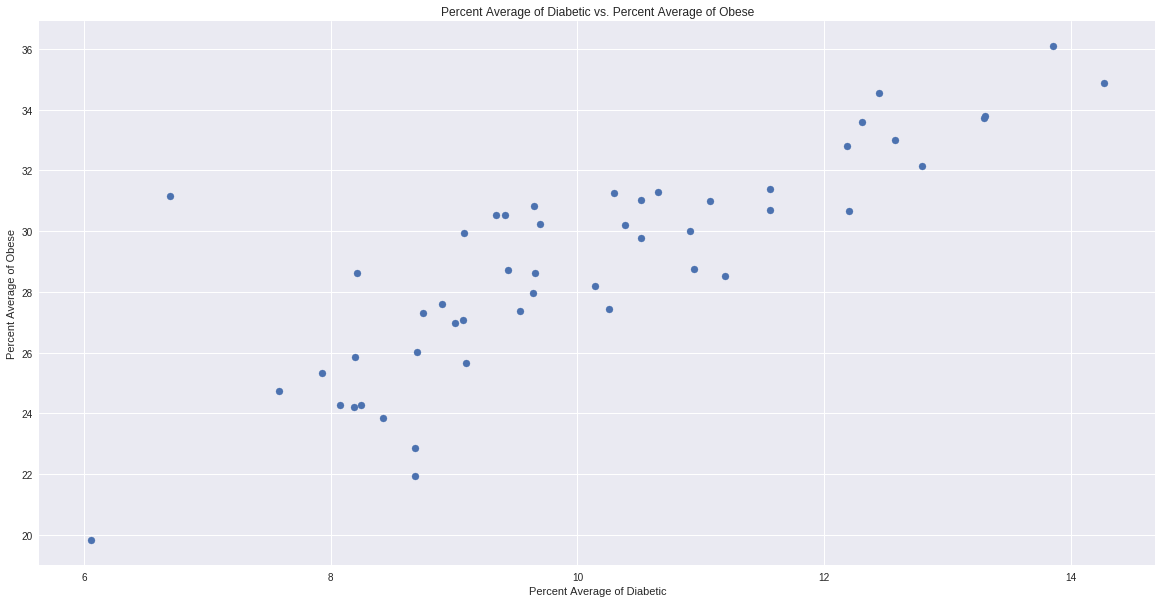

<function matplotlib.pyplot.close>

In [11]:
# Plot obvious relationships
plt.figure(figsize=(20,10))
plt.scatter(main_df['Diabetes_Adults_PCT_Avg'], main_df['Obesity_Adults_PCT_Avg'])
plt.title("Percent Average of Diabetic vs. Percent Average of Obese")
plt.xlabel("Percent Average of Diabetic")
plt.ylabel("Percent Average of Obese")
plt.show()
plt.close

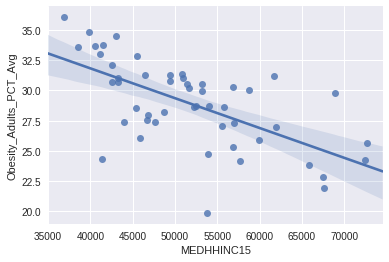

In [12]:
# Obesity vs Median Income
sns.regplot(x = main_df['MEDHHINC15'], y = main_df['Obesity_Adults_PCT_Avg'])

In [13]:
# Since I will work by county, import county info
supp_county = pd.read_csv("food_data/supp_county.csv", index_col = False)
supp_county.dropna(inplace = True)
supp_county["FIPS "] = supp_county["FIPS "].astype(int)
supp_county.rename(columns = {"FIPS ": "FIPS"}, inplace = True)

In [14]:
# Generate overall dataframe by county
all_data_by_county = supp_county.copy()
all_df = [access, restaurants, socioeconomic, stores, health]
for df in all_df:
    all_data_by_county = all_data_by_county.merge(df, how = "inner", on = "FIPS")

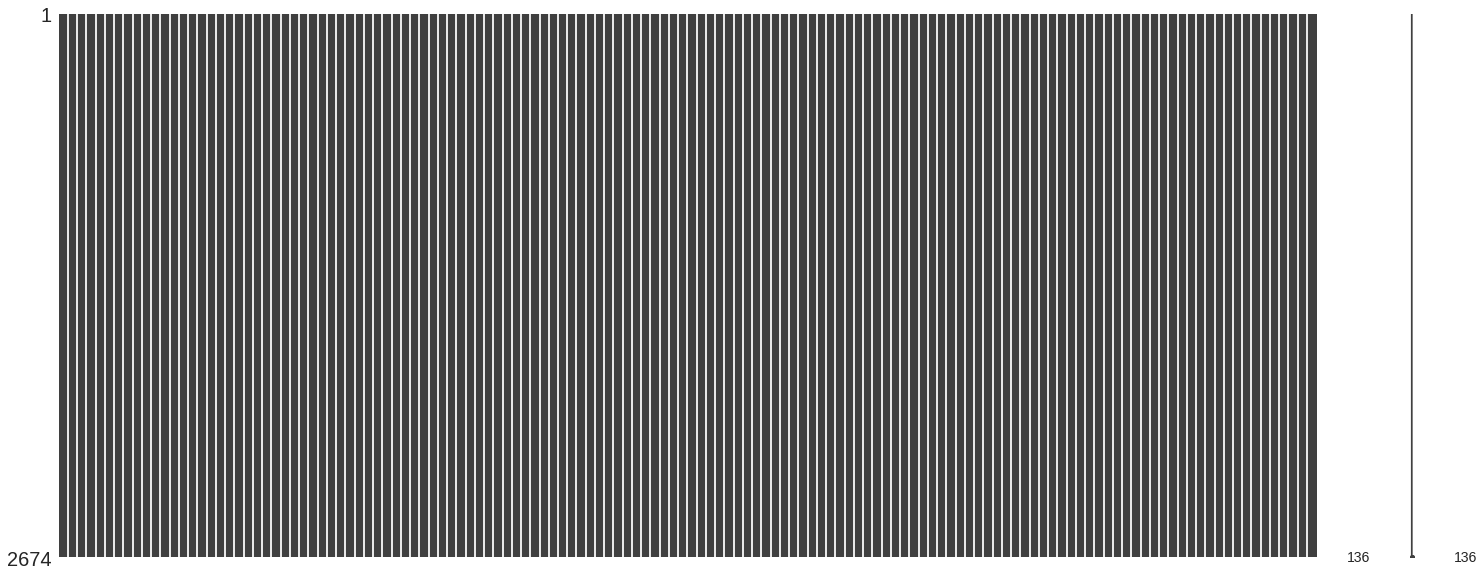

In [15]:
# Visualize to see if there are missing values
msno.matrix(all_data_by_county)

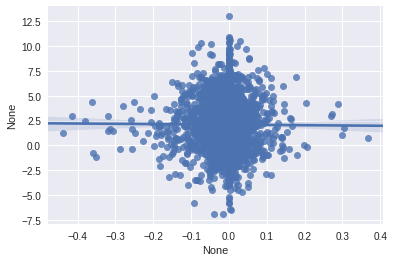

In [16]:
# These and the following plots are to find relevant parameters
sns.regplot(all_data_by_county["RECFACPTH14"] - all_data_by_county["RECFACPTH09"],all_data_by_county["PCT_OBESE_ADULTS13"] - all_data_by_county["PCT_OBESE_ADULTS08"])

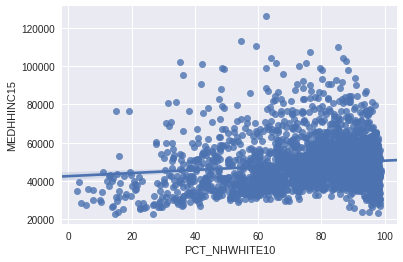

In [17]:
sns.regplot(all_data_by_county["PCT_NHWHITE10"], all_data_by_county["MEDHHINC15"])

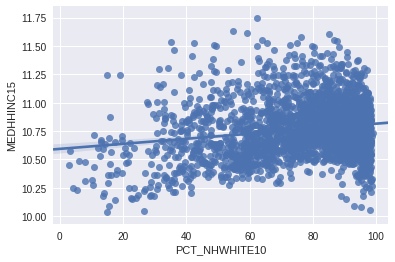

In [18]:
sns.regplot(all_data_by_county["PCT_NHWHITE10"], np.log(all_data_by_county["MEDHHINC15"]))

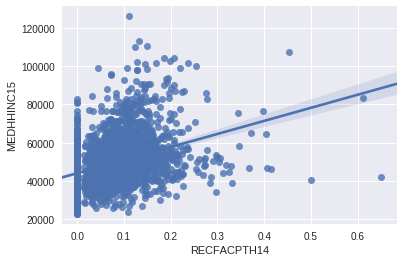

In [19]:
sns.regplot(all_data_by_county["RECFACPTH14"], all_data_by_county["MEDHHINC15"])

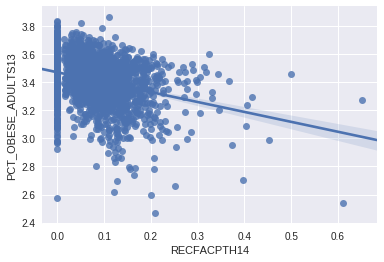

In [20]:
sns.regplot(all_data_by_county["RECFACPTH14"], np.log(all_data_by_county["PCT_OBESE_ADULTS13"]))

In [21]:
# Import Linear Regression packages
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score

In [22]:
# Sample model, just to see if our assumptions were justifie
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score

regr_simple = linear_model.LinearRegression()
data_for_linear_regression_simple = all_data_by_county[["MEDHHINC15","RECFACPTH14","PCT_OBESE_ADULTS13",
                                                'PCT_DIABETES_ADULTS13']]

data_for_linear_regression_simple["MEDHHINC15"] = np.log(data_for_linear_regression_simple["MEDHHINC15"]) ** (3/2)
data_for_linear_regression_simple["PCT_OBESE_ADULTS13"] = data_for_linear_regression_simple["PCT_OBESE_ADULTS13"]

train_simple = data_for_linear_regression_simple[data_for_linear_regression_simple.index % 5 != 3]
test_simple = data_for_linear_regression_simple[data_for_linear_regression_simple.index % 5 == 3]

train_simple_y = test_simple["PCT_OBESE_ADULTS13"]
train_simple_x = test_simple.drop("PCT_OBESE_ADULTS13", axis = 1)

test_simple_y = test_simple["PCT_OBESE_ADULTS13"]
test_simple_x = test_simple.drop("PCT_OBESE_ADULTS13", axis = 1)

regr_simple.fit(train_simple_x, train_simple_y)

pred_simple_y = regr_simple.predict(test_simple_x)

print("MSE: ", mean_squared_error(test_simple_y, pred_simple_y))

print("R^2 value: ", r2_score(test_simple_y, pred_simple_y))

print("Coefficients: ", regr_simple.coef_)

MSE:  10.1875226723
R^2 value:  0.479147297207
Coefficients:  [-0.29905098 -3.26450774  1.13227647]


/home/edwardcen/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
/home/edwardcen/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # Remove the CWD from sys.path while we load stuff.


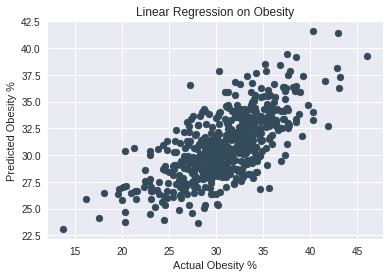

In [23]:
with sns.color_palette("Blues_d", 6):
    plt.scatter(test_simple_y, pred_simple_y)
plt.title("Linear Regression on Obesity")
plt.xlabel("Actual Obesity %")
plt.ylabel("Predicted Obesity %")

In [24]:
# Iteration 1
regr = linear_model.LinearRegression()
data_for_linear_regression = all_data_by_county[["MEDHHINC15","RECFACPTH14","PCT_OBESE_ADULTS13",
                                                'PCT_DIABETES_ADULTS13', "FFRPTH14", "GROCPTH14"]]

data_for_linear_regression["MEDHHINC15"] = np.log(data_for_linear_regression["MEDHHINC15"])

train = data_for_linear_regression[data_for_linear_regression.index % 5 != 3]
test = data_for_linear_regression[data_for_linear_regression.index % 5 == 3]

train_y = test["PCT_OBESE_ADULTS13"]
train_x = test.drop("PCT_OBESE_ADULTS13", axis = 1)

test_y = test["PCT_OBESE_ADULTS13"]
test_x = test.drop("PCT_OBESE_ADULTS13", axis = 1)

regr.fit(train_x, train_y)

pred_y = regr.predict(test_x)

print("MSE: ", mean_squared_error(test_y, pred_y))

print("R^2 value: ", r2_score(test_y, pred_y))

print("Coefficients: ", regr.coef_)

MSE:  9.9342085865
R^2 value:  0.492098367895
Coefficients:  [-1.63475014 -4.63242065  1.09095174 -0.47499969 -2.44060587]


/home/edwardcen/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


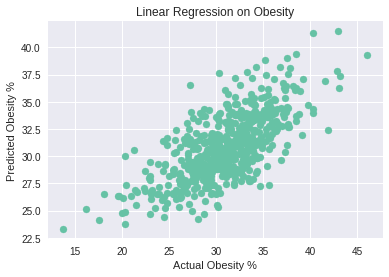

In [25]:
with sns.color_palette("Set2", 6):
    plt.scatter(test_y, pred_y)
plt.title("Linear Regression on Obesity")
plt.xlabel("Actual Obesity %")
plt.ylabel("Predicted Obesity %")

In [26]:
# Iteration 2
regr_improved = linear_model.LinearRegression()
data_for_linear_regression_improved = all_data_by_county[["MEDHHINC15","RECFACPTH14","PCT_OBESE_ADULTS13",
                                                'PCT_DIABETES_ADULTS13', "FFRPTH14", "GROCPTH14"]]

data_for_linear_regression_improved["MEDHHINC15"] = np.log(data_for_linear_regression_improved["MEDHHINC15"])

train_improved = data_for_linear_regression_improved[data_for_linear_regression_improved.index % 5 != 3]
test_improved = data_for_linear_regression_improved[data_for_linear_regression_improved.index % 5 == 3]

train_improved_y = test_improved["PCT_OBESE_ADULTS13"]
train_improved_x = test_improved.drop("PCT_OBESE_ADULTS13", axis = 1)

test_improved_y = test_improved["PCT_OBESE_ADULTS13"]
test_improved_x = test_improved.drop("PCT_OBESE_ADULTS13", axis = 1)

regr_improved.fit(train_improved_x, train_improved_y)

pred_improved_y = regr_improved.predict(test_improved_x)

print("MSE: ", mean_squared_error(test_improved_y, pred_improved_y))

print("R^2 value: ", r2_score(test_improved_y, pred_improved_y))

print("Coefficients: ", regr_improved.coef_)

MSE:  9.9342085865
R^2 value:  0.492098367895
Coefficients:  [-1.63475014 -4.63242065  1.09095174 -0.47499969 -2.44060587]


/home/edwardcen/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


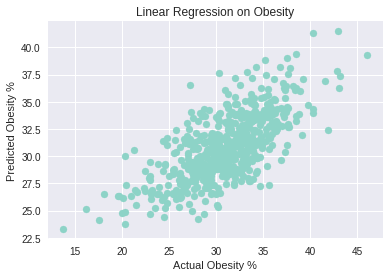

In [27]:
with sns.color_palette("Set3", 6):
    plt.scatter(test_improved_y, pred_improved_y)
plt.title("Linear Regression on Obesity")
plt.xlabel("Actual Obesity %")
plt.ylabel("Predicted Obesity %")

In [28]:
# Iteration 3
regr_improved3 = linear_model.LinearRegression()
data_for_linear_regression_improved3 = all_data_by_county[["MEDHHINC15","RECFACPTH14","PCT_OBESE_ADULTS13",
                                                'PCT_DIABETES_ADULTS13', "FFRPTH14", "GROCPTH14"]]

data_for_linear_regression_improved3["MEDHHINC15"] = np.log(data_for_linear_regression_improved3["MEDHHINC15"])
data_for_linear_regression_improved3["PCT_OBESE_ADULTS13"] = np.log(data_for_linear_regression_improved3["PCT_OBESE_ADULTS13"])

train_improved3 = data_for_linear_regression_improved3[data_for_linear_regression_improved3.index % 5 != 3]
test_improved3 = data_for_linear_regression_improved3[data_for_linear_regression_improved3.index % 5 == 3]

train_improved3_y = test_improved3["PCT_OBESE_ADULTS13"]
train_improved3_x = test_improved3.drop("PCT_OBESE_ADULTS13", axis = 1)

test_improved3_y = test_improved3["PCT_OBESE_ADULTS13"]
test_improved3_x = test_improved3.drop("PCT_OBESE_ADULTS13", axis = 1)

regr_improved3.fit(train_improved3_x, train_improved3_y)

pred_improved3_y = regr_improved3.predict(test_improved3_x)

print("MSE: ", mean_squared_error(test_improved3_y, pred_improved3_y))

print("R^2 value: ", r2_score(test_improved3_y, pred_improved3_y))

print("Coefficients: ", regr_improved3.coef_)

MSE:  0.012084793172
R^2 value:  0.470914548233
Coefficients:  [-0.04276663 -0.19420975  0.0367989  -0.01804304 -0.08437603]


/home/edwardcen/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/home/edwardcen/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys


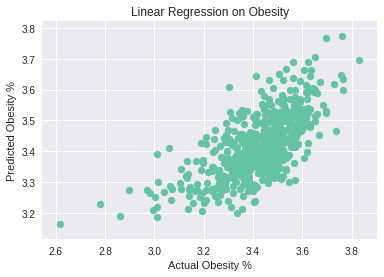

In [29]:
with sns.color_palette("Set2", 6):
    plt.scatter(test_improved3_y, pred_improved3_y)
plt.title("Linear Regression on Obesity")
plt.xlabel("Actual Obesity %")
plt.ylabel("Predicted Obesity %")

In [30]:
# Final Iteration
regr_improved2 = linear_model.LinearRegression()
data_for_linear_regression_improved2 = all_data_by_county[["MEDHHINC15","RECFACPTH14","PCT_OBESE_ADULTS13",
                                                'PCT_DIABETES_ADULTS13', "FFRPTH14", "GROCPTH14"]]
#No log
#data_for_linear_regression_improved2["MEDHHINC15"] = np.log(data_for_linear_regression_improved2["MEDHHINC15"])

train_improved2 = data_for_linear_regression_improved2[data_for_linear_regression_improved2.index % 4 != 2]
test_improved2 = data_for_linear_regression_improved2[data_for_linear_regression_improved2.index % 4 == 2]

train_improved2_y = test_improved2["PCT_OBESE_ADULTS13"]
train_improved2_x = test_improved2.drop("PCT_OBESE_ADULTS13", axis = 1)

test_improved2_y = test_improved2["PCT_OBESE_ADULTS13"]
test_improved2_x = test_improved2.drop("PCT_OBESE_ADULTS13", axis = 1)

regr_improved2.fit(train_improved2_x, train_improved2_y)

pred_improved2_y = regr_improved2.predict(test_improved2_x)

print("MSE: ", mean_squared_error(test_improved2_y, pred_improved2_y))

print("R^2 value: ", r2_score(test_improved2_y, pred_improved2_y))

print("Coefficients: ", regr_improved2.coef_)

MSE:  9.53957973596
R^2 value:  0.527735992366
Coefficients:  [ -2.66786736e-05  -4.48792585e+00   1.14246441e+00  -1.26375801e+00
  -2.48492902e+00]


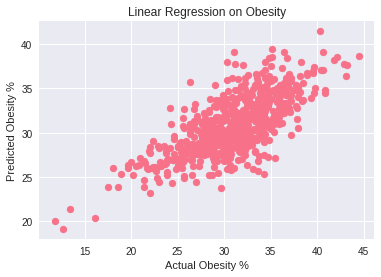

In [31]:
with sns.color_palette("husl", 6):
    plt.scatter(test_improved2_y, pred_improved2_y)
plt.title("Linear Regression on Obesity")
plt.xlabel("Actual Obesity %")
plt.ylabel("Predicted Obesity %")

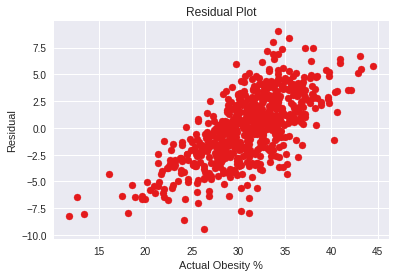

In [32]:
with sns.color_palette("Set1", 6):
    plt.scatter(test_improved2_y, test_improved2_y - pred_improved2_y)
plt.title("Residual Plot")
plt.xlabel("Actual Obesity %")
plt.ylabel("Residual")